<a href="https://colab.research.google.com/github/SonAz/Decision-Tree-Bank/blob/main/Decision_Tree_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Importing the Dataset

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/bank_data.csv")
#value=['Outlook','Temprature','Humidity','Wind']
df.head(10)

,Tuoi,Giotinh,Hokhau,Thunhap,Kethon,SoCon,XeOto,TaikhoaTietkiem,TaikhoanHientai,TaikhoanThechap,RESULT
0,Gia,Nam,Thanhpho,Thap,Khong,1,Khong,Khong,Khong,Khong,True
1,Trung nien,Nu,Thitran,Trungbinh,Co,3,Co,Khong,Co,Co,False
2,Gia,Nam,Thanhpho,Thap,Co,2,Co,Co,Co,Khong,False
3,Thanh nien,Nam,Thitran,Trungbinh,Co,3,Khong,Khong,Co,Khong,False
4,Gia,Nam,Nongthon,Cao,Co,2,Khong,Co,Khong,Khong,False
5,Gia,Nam,Thitran,Trungbinh,Co,2,Khong,Co,Co,Khong,True
6,Thanh nien,Nu,Nongthon,Thap,Khong,2,Khong,Khong,Co,Khong,True
7,Gia,Nu,Thitran,Trungbinh,Co,2,Co,Co,Co,Khong,False
8,Trung nien,Nam,Ngoaio,Trungbinh,Co,2,Co,Khong,Khong,Khong,False
9,Gia,Nu,Thitran,Trungbinh,Co,2,Co,Co,Co,Khong,False


#Data Analysis

In [ ]:
len(df)           #Dataset Lenght


600

In [ ]:
df.shape  #To see the number of rows and columns in our dataset:

(600, 11)

In [ ]:
df.describe()     #To see statistical details of the dataset:

,SoCon
count,600.000000
mean,1.888333
std,0.571321
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


#Preparing the Data (Data Slicing)

In [ ]:


#machine learning algorithms can only learn from numbers (int, float, doubles .. )
#so let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
df=df.apply(string_to_int.fit_transform) #fit and transform it
df



,Tuoi,Giotinh,Hokhau,Thunhap,Kethon,SoCon,XeOto,TaikhoaTietkiem,TaikhoanHientai,TaikhoanThechap,RESULT
0,0,0,2,1,1,0,1,1,1,1,1
1,2,1,3,2,0,2,0,1,0,0,0
2,0,0,2,1,0,1,0,0,0,1,0
3,1,0,3,2,0,2,1,1,0,1,0
4,0,0,1,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,2,0,1,1,0,0,0,0,0
596,2,0,2,1,0,1,0,0,0,1,0
597,2,0,3,1,0,1,0,0,1,1,1
598,1,1,2,1,0,1,1,0,1,0,0


In [ ]:


#To divide our data into attribute set and Label:
feature_cols = ['Tuoi','Giotinh','Hokhau','Thunhap','Kethon','SoCon','XeOto','TaikhoaTietkiem','TaikhoanHientai','TaikhoanThechap']
X = df[feature_cols]                               #contains the attribute
y = df.RESULT                                  #contains the label



In [ ]:
#To divide our data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape)
X_train

(420, 10)


,Tuoi,Giotinh,Hokhau,Thunhap,Kethon,SoCon,XeOto,TaikhoaTietkiem,TaikhoanHientai,TaikhoanThechap
127,0,0,2,0,0,1,1,0,0,1
36,1,1,1,1,0,2,0,0,0,1
307,2,1,1,2,1,1,0,0,0,1
165,1,1,1,2,0,0,1,1,0,0
586,1,1,2,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
110,2,1,3,2,1,1,1,0,0,1
469,0,1,3,2,1,2,0,0,0,1
95,1,0,2,1,0,1,1,0,0,1
211,0,1,3,2,0,0,0,0,0,1


#Training and Making Predictions

In [ ]:
# perform training
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)     # create a classifier object
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [ ]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7



    Now let's compare some of our predicted values with the actual values and see how accurate we were:



In [ ]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
329,0,0
184,0,0
232,1,0
398,1,1
11,0,0
...,...,...
351,0,0
30,0,0
494,0,1
296,0,0


#Evaluating the Algorithm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79 22]
 [32 47]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.75       101
           1       0.68      0.59      0.64        79

    accuracy                           0.70       180
   macro avg       0.70      0.69      0.69       180
weighted avg       0.70      0.70      0.70       180



#Visualizing Decision Trees

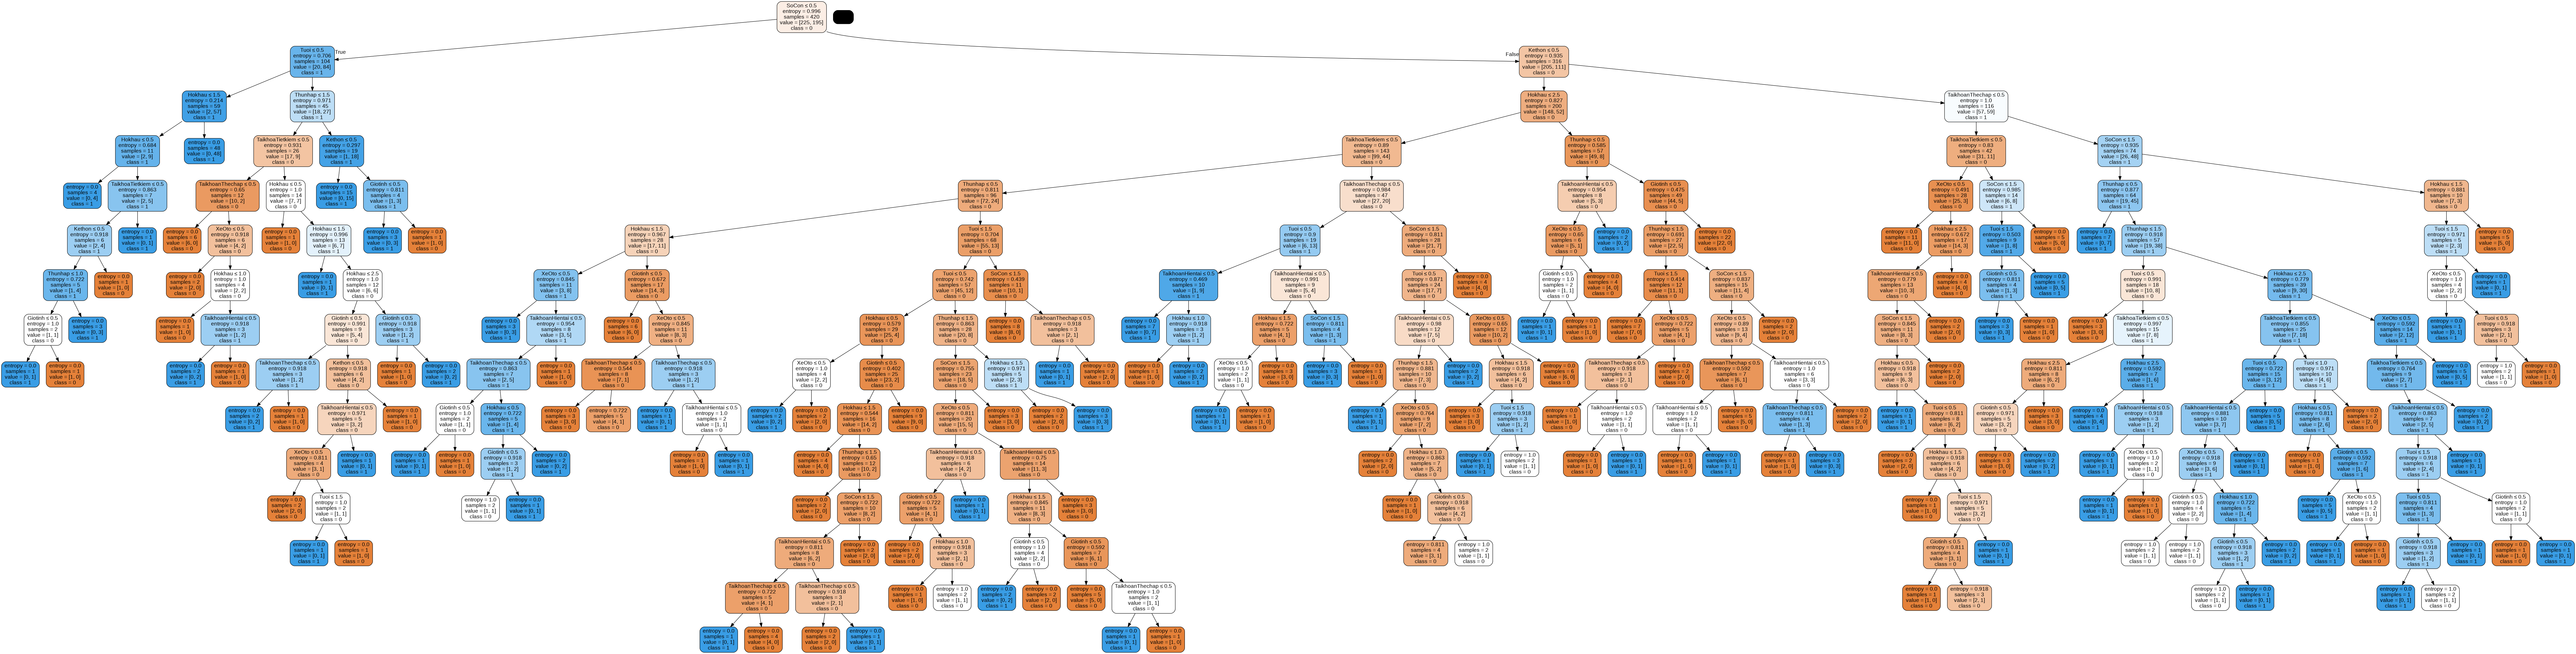

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())